In [1]:
# Exploring data and visualization
# Create a linear regression model
# Evaluate model
# Make prediction
# Calculate Root Mean Square Error (RMSE)
# What if we consider more/less features?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
house = pd.read_csv('house_data.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Display SalaPrice series
house['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
# Display highest sale price
house['SalePrice'].max()

755000

In [8]:
# Display LotArea series
house['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
5       14115
6       10084
7       10382
8        6120
9        7420
10      11200
11      11924
12      12968
13      10652
14      10920
15       6120
16      11241
17      10791
18      13695
19       7560
20      14215
21       7449
22       9742
23       4224
24       8246
25      14230
26       7200
27      11478
28      16321
29       6324
        ...  
1430    21930
1431     4928
1432    10800
1433    10261
1434    17400
1435     8400
1436     9000
1437    12444
1438     7407
1439    11584
1440    11526
1441     4426
1442    11003
1443     8854
1444     8500
1445     8400
1446    26142
1447    10000
1448    11767
1449     1533
1450     9000
1451     9262
1452     3675
1453    17217
1454     7500
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [9]:
# Display highest LotArea among all
house['LotArea'].max()

215245

Text(0, 0.5, 'price of house')

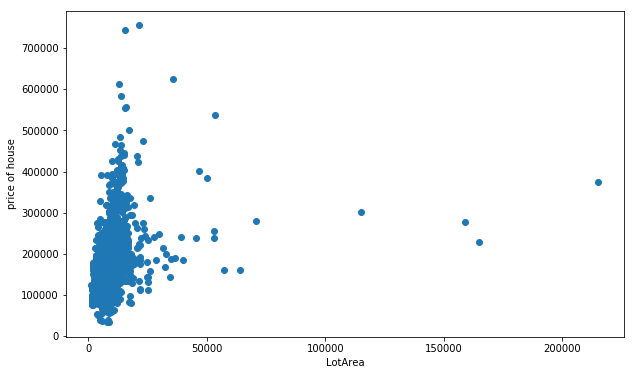

In [10]:
# Plot LotArea Vs SalePrice as scatter plot
plt.figure(figsize=(10,6)) # set figure size big
plt.scatter(house['LotArea'], house['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('price of house')

/home/uib14108/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


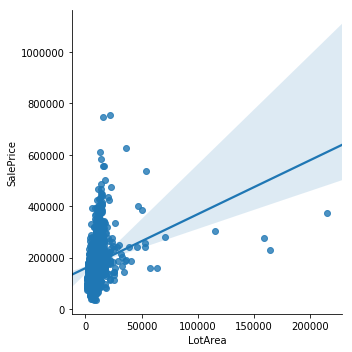

In [11]:
# linear regression line
sns.lmplot('LotArea', 'SalePrice', data=house)

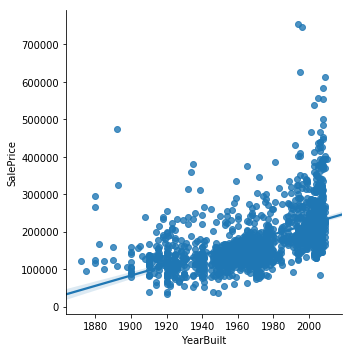

In [12]:
# YearBuilt Vs Price linear regression line
sns.lmplot('YearBuilt', 'SalePrice', data=house)

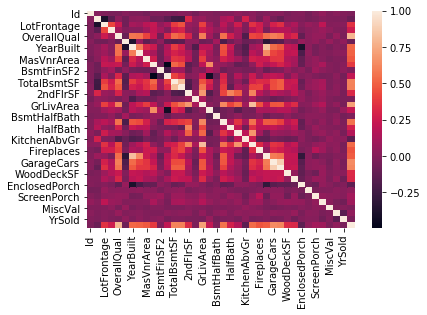

In [13]:
# Heatmap plot
sns.heatmap(house.corr())
plt.savefig("heatmap.png")

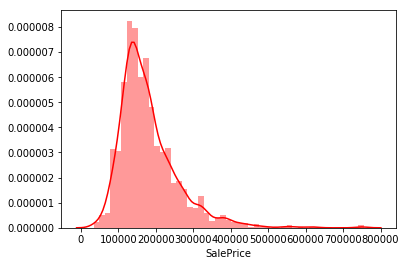

In [14]:
sns.distplot(house['SalePrice'], color='red')

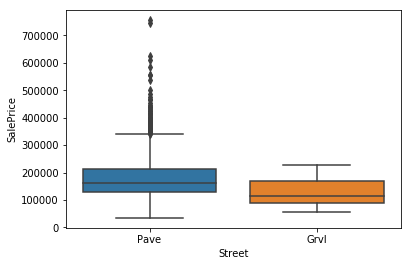

In [15]:
sns.boxplot(x='Street', y='SalePrice', data=house)

### Linear regression model

In [16]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
keep_col = [
    'LotFrontage',
    'LotArea',
    'LotShape',
    'YearBuilt',
    'GrLivArea',
    'FullBath',
    'BedroomAbvGr',
    'SalePrice'
]

feature = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'FullBath',
    'BedroomAbvGr'
]

house = house[keep_col].dropna()

X = house[feature]
y = house['SalePrice']

In [18]:
house.shape

(1201, 8)

In [19]:
y.shape

(1201,)

In [20]:
X.shape

(1201, 6)

In [21]:
# Train model in above 12 feature
# By default 75% training, 25% testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split datasets into training and test data, here test data is 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(840, 6) (840,)
(361, 6) (361,)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# Instantiate LinearRegression model
model = LinearRegression()

In [27]:
# Train linear regression model using fit() method
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
prediction = model.predict(X_test)

In [29]:
prediction.shape

(361,)

In [30]:
prediction[0] # predicted price of first house

136239.7816752249

### Evaluate Model

In [31]:
house1 = house.loc[1]
# Actual price of house1
house1['SalePrice']

181500

In [32]:
#Predicted price of house1
prediction[0]

136239.7816752249

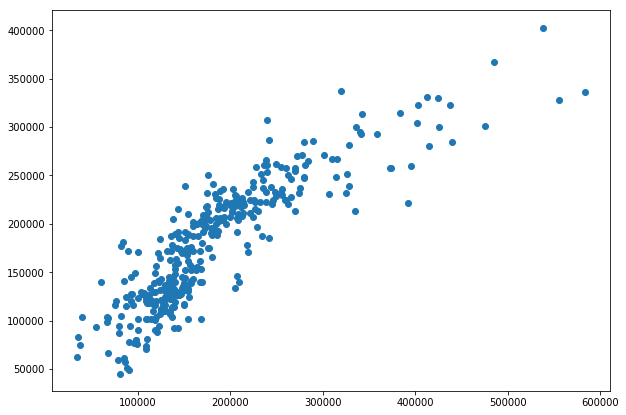

In [33]:
# To see how well model predicted price; plot predicted vs actual price
# y_test is actual prices 
plt.figure(figsize=(10,7))
plt.scatter(y_test, prediction)

### RMSE

In [34]:
# SKlearn has lib metrix which can be used to find mean square error

In [35]:
import numpy as np
from sklearn import metrics

In [36]:
# This is mean square error
mean_sq_error = metrics.mean_squared_error(y_test, prediction)

In [37]:
# Root mean square error is square root of mean square error
rmse = np.sqrt(mean_sq_error)
rmse

44324.001673417835

In [38]:
# Build another model with fewer feature and compare rmse with one above

In [39]:
df2 = pd.read_csv('train.csv')
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [40]:
keep_col = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'SalePrice'
]

feature = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
]

df2 = df2[keep_col].dropna()

X = df2[feature]
y = df2['SalePrice']

In [41]:
X.shape, y.shape

((1201, 4), (1201,))

In [42]:
X_train2, X_test2, y_train2, y_test2  = train_test_split(X, y, test_size=0.3, random_state=7)

In [43]:
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(840, 4) (840,)
(361, 4) (361,)


In [44]:
model2 = LinearRegression()

In [45]:
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
prediction2 = model2.predict(X_test2)

In [47]:
print("Actual price of house1 ", house['SalePrice'][0])
print("Model-1 predicted price of house1 ", prediction[0])

print("Actual price price of house1", df2['SalePrice'][0])
print("Model-2 predicts price of house1", prediction2[0])


Actual price of house1  208500
Model-1 predicted price of house1  136239.7816752249
Actual price price of house1 208500
Model-2 predicts price of house1 141948.85661074985


In [48]:
# mean square error for model-2
mean_sq_error2 = metrics.mean_squared_error(y_test2, prediction2)

In [49]:
rmse2 = np.sqrt(mean_sq_error2)

In [50]:
# comapring two rmse, more the number of feature minimize rmse
print("RMSE for model-1", rmse)
print("RMSE for model-2", rmse2)

RMSE for model-1 44324.001673417835
RMSE for model-2 46675.239241069714


In [51]:
print("Actual price price of house1", df2.loc[0, 'SalePrice'])
print("Actual price price of house1", df2['SalePrice'][0])
print("Actual price price of house1", df2.SalePrice[0])
print("Actual price price of house1", df2.iloc[0:1, 4:5])
print("Row-1", df2.loc[0:0,:])
print()
print("Row-1", df2.iloc[0,:])

Actual price price of house1 208500
Actual price price of house1 208500
Actual price price of house1 208500
Actual price price of house1    SalePrice
0     208500
Row-1    LotFrontage  LotArea  YearBuilt  GrLivArea  SalePrice
0         65.0     8450       2003       1710     208500

Row-1 LotFrontage        65.0
LotArea          8450.0
YearBuilt        2003.0
GrLivArea        1710.0
SalePrice      208500.0
Name: 0, dtype: float64


### Cleaning dataset

In [52]:
df3 = pd.read_csv('train.csv', index_col=0)
df3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [53]:
# values by category types
df3.MSZoning.astype('category').values

[RL, RL, RL, RL, RL, ..., RL, RL, RL, RL, RL]
Length: 1460
Categories (5, object): [C (all), FV, RH, RL, RM]

In [54]:
# One hot encoding on 'MSZoing' series
# Purpose: 'MSZoing' feature type is string and can't be used to train linear regr mode (only int allowed).
# After one hot encoding each categorical value becomes a feature (column containing integer)
# Return: dataframe

df_MSZoning = pd.get_dummies(df3.MSZoning)
df_MSZoning.shape

(1460, 5)

In [59]:
# Merge 'df_MSZoning' with original dataframe
frames = [df3, df_MSZoning]
df3 = pd.concat(frames)
df3.index
df3.columns

/home/uib14108/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Index(['C (all)', 'FV', 'GrLivArea', 'LotArea', 'LotFrontage', 'RH', 'RL',
       'RM', 'SalePrice', 'YearBuilt'],
      dtype='object')

In [58]:
keep_col = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'SalePrice'
]

feature = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
]

df3 = df3[keep_col].dropna()

X = df3[feature]
y = df3['SalePrice']